## **Project Overview**

### **Objective:**
-What is the typical price point for each level of RAM offered across companies?

### **Data Source:**
- https://www.kaggle.com/datasets/krishnandansah/laptop-data 

## **Data Collection & Loading**

### **Import Pandas, Numpy & Matplotlip**

In [1]:
# Loading pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Load**

In [2]:
# Loading dataset
laptop_data = pd.read_csv("laptopData.csv")

### **Initial Checks**

In [3]:
# Dispaly information about the dataset (i.e., row counts, column counts, column names, datatypes, # of non-null rows)
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [4]:
# Display the first 5 rows
laptop_data.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
# Display the last 5 rows
laptop_data.tail(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [6]:
# View list and count of laptop companies in df
count = laptop_data["Company"].value_counts()
print(count)
# Output shows a value for "Vero" which is a model of Acer
# Code to replace this value will be under the Data Type Adjustments section

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64


In [7]:
count = laptop_data["Cpu"].value_counts()
print(count)

Cpu
Intel Core i5 7200U 2.5GHz       183
Intel Core i7 7700HQ 2.8GHz      142
Intel Core i7 7500U 2.7GHz       128
Intel Core i7 8550U 1.8GHz        72
Intel Core i5 8250U 1.6GHz        68
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64


In [8]:
# Provides statistical analysis of numerical columns & rounds output to 2 decimal places
laptop_data.describe().round(2)

,Unnamed: 0,Price
count,1273.00,1273.00
mean,652.67,59955.81
std,376.49,37332.25
min,0.00,9270.72
25%,327.00,31914.72
50%,652.00,52161.12
75%,980.00,79333.39
max,1302.00,324954.72


In [9]:
# Select_dtypes() filters columns based on specified data type, in my case "Objects" since the rest of my columns contain strings, within the df.  
# Describe() returns a statistical description of the specified data types in the df including total count, unique values in each column, the top value in each column and its frequency
laptop_data.select_dtypes("object").describe()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273
unique,19,6,25,40,118,10,40,110,9,189
top,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,290,710,640,495,183,601,401,271,1047,111


### **Selection Options**

In [10]:
# Drop columns that won't be used & ensure correct column was removed
laptop_data_drop = laptop_data.drop("Unnamed: 0", axis = 1)
laptop_data_drop.columns 

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

## **Data Cleaning & Preparation**

### **Handle Missing Values**

In [11]:
# Row count of null data
laptop_data_drop.isnull().any(axis=1).sum()

np.int64(30)

In [12]:
# Displays only rows with null values
laptop_data_drop[laptop_data_drop.isnull().any(axis=1)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Drop rows with null values
laptop_data_drop = laptop_data_drop.dropna()

In [14]:
# Check df to ensure 30 rows were dropped from the original 1303 (should be total of 1273)
laptop_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


### **Handle Duplicated Rows**

In [15]:
# Display boolean count of duplicated rows, if any
laptop_data_drop.duplicated().value_counts()

# Output shows there are 29 rows of duplicated data

False    1244
True       29
Name: count, dtype: int64

In [16]:
# Display only duplicated rows which includes null rows
laptop_data_drop[laptop_data_drop.duplicated(keep=False)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1172,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1261,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1262,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1263,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1264,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1265,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1266,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1267,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [17]:
# Drop duplicated rows (should reduce row count to 1244)
laptop_data_deduped = laptop_data_drop.drop_duplicates()
# Then display count of duplicated rows (should display "False 1244")
# Since there is no "True" count, I can confirm there are no more rows with null values
laptop_data_deduped.duplicated().value_counts()


False    1244
Name: count, dtype: int64

### **Handle Special Characters**

In [18]:
# Identify if special character exits, i.e. "?"
# Counts total # of "?" by column 
qm_counts = (laptop_data_deduped == "?").sum()
# Sums total # of "?" in the df by column
total_qms = qm_counts.sum()
print("Counts of '?' by column: ")
print()
print(qm_counts)
print()
print(f"Total count of '?' in the df: {total_qms}.")

Counts of '?' by column: 

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              1
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64

Total count of '?' in the df: 3.


In [19]:
# Identify index # of row with "?" to use for dropping these rows as inconclusive data will not aid in my decision
questmark1 = laptop_data_deduped[laptop_data_deduped.Inches == "?"]
questmark2 = laptop_data_deduped[laptop_data_deduped.Memory == "?"]
questmark3 = laptop_data_deduped[laptop_data_deduped.Weight == "?"]
print(questmark1.index)
print(questmark2.index)
print(questmark3.index)

Index([476], dtype='int64')
Index([770], dtype='int64')
Index([208], dtype='int64')


In [20]:
# Drop rows with inconclusive/incomplete data (a.k.a. rows containing "?" in place of null or column value)
# 3 rows should be removed from last row total of 1244 in cell 32 output
laptop_data_drop_qm = laptop_data_deduped.drop(index = [208, 476, 770], axis = 0)
laptop_data_drop_qm


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [21]:
# Rechecking total count of "?" in df to ensure all rows containing the value were dropped even though output above shows a total of 1241 rows
qm_counts = (laptop_data_drop_qm == "?").sum()
# Sums total # of "?" in the df by column
total_qms = qm_counts.sum()
print(f"Total count of '?' in the df: {total_qms}.")

Total count of '?' in the df: 0.


### **Data Type Adjustments**

In [22]:
# Remove "kg" from data in Weight column in preparation to 
laptop_data_drop_qm["Weight"] = laptop_data_drop_qm["Weight"].str.replace("kg","")
# Display first three rows to ensure "kg" was removed from Weight column
laptop_data_drop_qm.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [23]:
# Remove "GB" from data in RAM column to create integer
laptop_data_drop_qm["Ram"] = laptop_data_drop_qm["Ram"].str.replace("GB","")
# Display first three rows to ensure "kg" was removed from Weight column
laptop_data_drop_qm.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [24]:
# Replace "Vero" with "Acer" in "Company" column
laptop_data_drop_qm["Company"] = laptop_data_drop_qm["Company"].str.replace("Vero","Acer")
# Display list and count of laptop companies in df
count = laptop_data_drop_qm["Company"].value_counts()
print(count)
# Acer count should increase by 4


Company
Lenovo       282
Dell         278
HP           260
Asus         149
Acer         105
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64


In [25]:
# Change Weight and Inches columns to floats 
laptop_data_drop_qm[["Weight","Inches"]]=laptop_data_drop_qm[["Weight","Inches"]].astype(float)
laptop_data_drop_qm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1241 non-null   object 
 1   TypeName          1241 non-null   object 
 2   Inches            1241 non-null   float64
 3   ScreenResolution  1241 non-null   object 
 4   Cpu               1241 non-null   object 
 5   Ram               1241 non-null   object 
 6   Memory            1241 non-null   object 
 7   Gpu               1241 non-null   object 
 8   OpSys             1241 non-null   object 
 9   Weight            1241 non-null   float64
 10  Price             1241 non-null   float64
dtypes: float64(3), object(8)
memory usage: 116.3+ KB


In [26]:
# Rename columns
laptop_data_drop_qm.rename(columns={"Price":"Price_RUP","Cpu":"CPU","Ram":"RAM_in_GB","Gpu":"GPU"},inplace=True)
laptop_data_drop_qm.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'CPU', 'RAM_in_GB',
       'Memory', 'GPU', 'OpSys', 'Weight', 'Price_RUP'],
      dtype='object')

In [27]:
# Round "Price_RUP" column to 2 decimals & display top rows to ensure correct formatting
laptop_data_prices = laptop_data_drop_qm.round({"Price_RUP":2})
laptop_data_prices.head(2)

,Company,TypeName,Inches,ScreenResolution,CPU,RAM_in_GB,Memory,GPU,OpSys,Weight,Price_RUP
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52


### **Feature Engineering**

In [28]:
#Create final dataframe and add a new price column converting RUP to USD using latest exchange rate of $1 to 0.12 RUP as of 12/05/2024 in a new column named "Price_USD"
laptop_data_prices["Price_USD"] = (laptop_data_prices["Price_RUP"] * 0.012).round(2)
laptop_data_prices.head(2)


,Company,TypeName,Inches,ScreenResolution,CPU,RAM_in_GB,Memory,GPU,OpSys,Weight,Price_RUP,Price_USD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,856.54
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,574.75


In [29]:
# Create new df and drop the "Price_RUP" column since it's no longer needed
laptop_data_clean = laptop_data_prices.drop("Price_RUP",axis = 1)
laptop_data_clean.head(2)

,Company,TypeName,Inches,ScreenResolution,CPU,RAM_in_GB,Memory,GPU,OpSys,Weight,Price_USD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.54
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.75


In [30]:
# Determining price min, max, mean, and standard deviation to determine how prices should be added to buckets 
price_min = laptop_data_clean["Price_USD"].min().round()
price_max = laptop_data_clean["Price_USD"].max().round()
laptop_mean = laptop_data_clean["Price_USD"].mean().round()
laptop_std = laptop_data_clean["Price_USD"].std().round()

print(f"The maximum price is ${price_max} while the minimum price is ${price_min}.")
print(f"The mean price is ${laptop_mean} and the standard deviation is {laptop_std} points.")



The maximum price is $3899.0 while the minimum price is $111.0.
The mean price is $726.0 and the standard deviation is 449.0 points.


In [31]:
# Define a custom bucket array
buckets = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000] 

# Use "cut" to create a new column with the binned prices
laptop_data_clean["Price_Buckets"] = pd.cut(laptop_data_clean["Price_USD"], bins = buckets)
laptop_data_clean.head(3)

,Company,TypeName,Inches,ScreenResolution,CPU,RAM_in_GB,Memory,GPU,OpSys,Weight,Price_USD,Price_Buckets
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.54,"(500, 1000]"
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.75,"(500, 1000]"
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.63,"(0, 500]"


In [32]:
#sort values by price
laptop_data_clean.sort_values(by=["Company","Price_USD"],ascending=True,inplace=True)
#Reset the index within the df
laptop_data_clean.reset_index(drop=True,inplace=True)
laptop_data_clean.head(3)

,Company,TypeName,Inches,ScreenResolution,CPU,RAM_in_GB,Memory,GPU,OpSys,Weight,Price_USD,Price_Buckets
0,Acer,Netbook,11.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2,32GB SSD,Intel HD Graphics,Chrome OS,1.30,111.25,"(0, 500]"
1,Acer,Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35,125.31,"(0, 500]"
2,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2,16GB SSD,Intel HD Graphics,Chrome OS,2.19,127.23,"(0, 500]"


In [33]:
laptop_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1241 non-null   object  
 1   TypeName          1241 non-null   object  
 2   Inches            1241 non-null   float64 
 3   ScreenResolution  1241 non-null   object  
 4   CPU               1241 non-null   object  
 5   RAM_in_GB         1241 non-null   object  
 6   Memory            1241 non-null   object  
 7   GPU               1241 non-null   object  
 8   OpSys             1241 non-null   object  
 9   Weight            1241 non-null   float64 
 10  Price_USD         1241 non-null   float64 
 11  Price_Buckets     1241 non-null   category
dtypes: category(1), float64(3), object(8)
memory usage: 108.4+ KB


In [34]:
# Change Price_Buckets column to string for plotting purposes
laptop_data_clean["Price_Buckets"] = laptop_data_clean["Price_Buckets"].astype(str)


In [35]:
laptop_data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1241 non-null   object 
 1   TypeName          1241 non-null   object 
 2   Inches            1241 non-null   float64
 3   ScreenResolution  1241 non-null   object 
 4   CPU               1241 non-null   object 
 5   RAM_in_GB         1241 non-null   object 
 6   Memory            1241 non-null   object 
 7   GPU               1241 non-null   object 
 8   OpSys             1241 non-null   object 
 9   Weight            1241 non-null   float64
 10  Price_USD         1241 non-null   float64
 11  Price_Buckets     1241 non-null   object 
dtypes: float64(3), object(9)
memory usage: 116.5+ KB


## **Exploratory Data Analsys (EDA)**

### **Descriptive Statistics**

In [36]:
# Provides statistical analysis of numerical columns include count, mean, standard deviation, min, max
laptop_data_clean.describe()

,Inches,Weight,Price_USD
count,1241.000000,1241.000000,1241.000000
mean,15.139968,2.080298,726.437010
std,1.968231,0.814657,449.009169
min,10.100000,0.000200,111.250000
25%,14.000000,1.500000,391.680000
50%,15.600000,2.040000,632.330000
75%,15.600000,2.330000,957.760000
max,35.600000,11.100000,3899.460000


In [37]:
# Select_dtypes() filters columns based on specified data type, in my case "Objects" since the rest of my columns contain strings, within the df.  
# Describe() returns a statistical description of the specified data types in the df including total count, unique values in each column, the top value in each column and its frequency
laptop_data_clean.select_dtypes("object").describe()

,Company,TypeName,ScreenResolution,CPU,RAM_in_GB,Memory,GPU,OpSys,Price_Buckets
count,1241,1241,1241,1241,1241,1241,1241,1241,1241
unique,18,6,40,118,10,39,110,9,8
top,Lenovo,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,"(500, 1000]"
freq,282,688,490,183,593,399,269,1019,511


In [38]:
# Investigate relationship betwen inches and price
# Attempt failed - research later
#laptop_data_clean.groupby("Inches","Price_USD").sort_values(ascending=False)
result = laptop_data_clean.groupby(["Inches","Price_USD"]).count()
print(result)


                  Company  TypeName  ScreenResolution  CPU  RAM_in_GB  Memory  \
Inches Price_USD                                                                
10.1   306.25           1         1                 1    1          1       1   
       351.01           1         1                 1    1          1       1   
       413.20           1         1                 1    1          1       1   
11.3   830.53           1         1                 1    1          1       1   
11.6   111.25           1         1                 1    1          1       1   
...                   ...       ...               ...  ...        ...     ...   
31.6   385.53           1         1                 1    1          1       1   
33.5   1150.21          1         1                 1    1          1       1   
35.6   223.14           1         1                 1    1          1       1   
       261.50           1         1                 1    1          1       1   
       381.70           1   

### **Data Visualization**

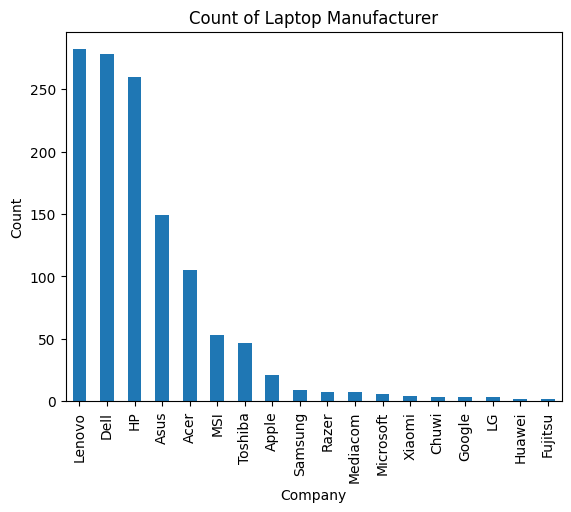

In [39]:
laptop_data_clean["Company"].value_counts().plot.bar()
plt.title("Count of Laptop Manufacturer")
plt.ylabel("Count")
plt.show()

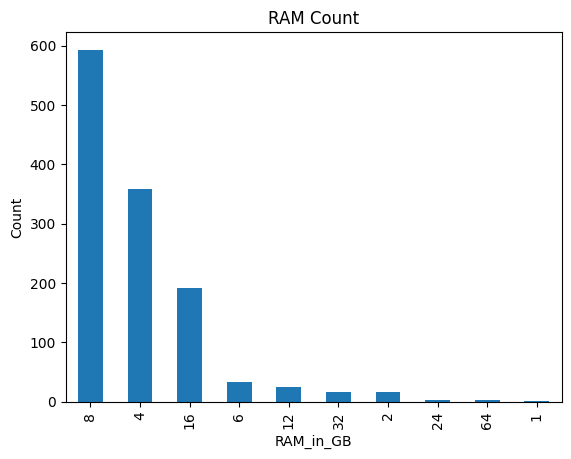

In [40]:
# Fequency of RAM in Gb
laptop_data_clean["RAM_in_GB"].value_counts().plot.bar()
plt.title("RAM Count")
plt.ylabel("Count")
plt.show()

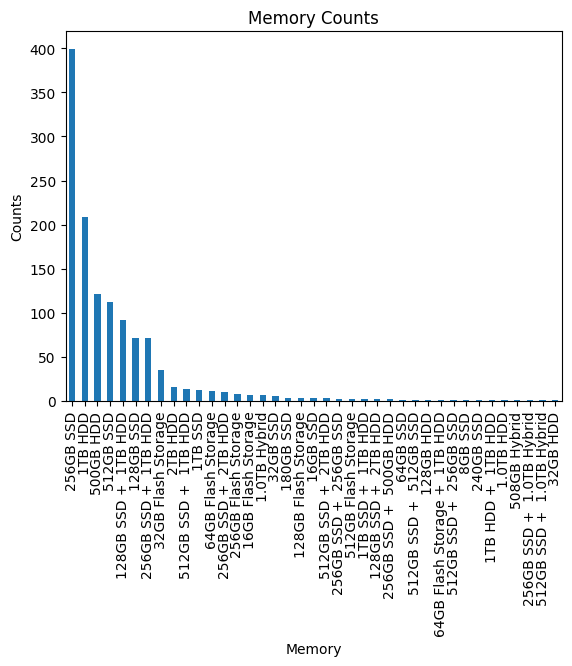

<Figure size 10000x1000 with 0 Axes>

In [41]:
laptop_data_clean["Memory"].value_counts().plot.bar()
plt.title("Memory Counts")
plt.ylabel("Counts")
plt.figure(figsize=(100,10))

plt.show()

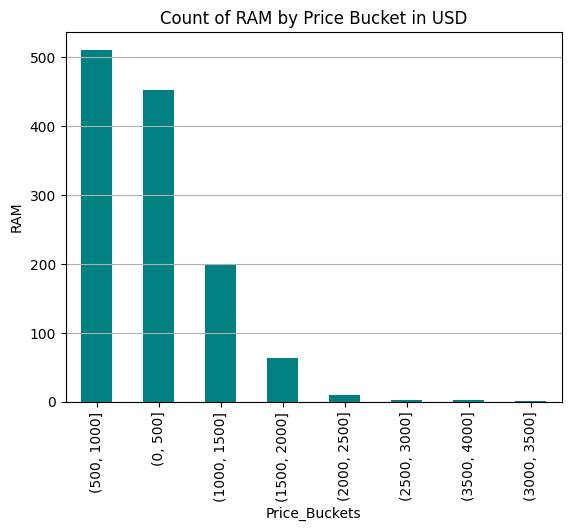

In [47]:
# # Investigate the amount of RAM by price point
fig, ax = plt.subplots()

fig = laptop_data_clean.groupby("Price_Buckets")["RAM_in_GB"].count().sort_values(ascending=False).plot(kind="bar", ylabel="RAM",color="teal")

plt.title("Count of RAM by Price Bucket in USD")

ax.grid(axis="y")

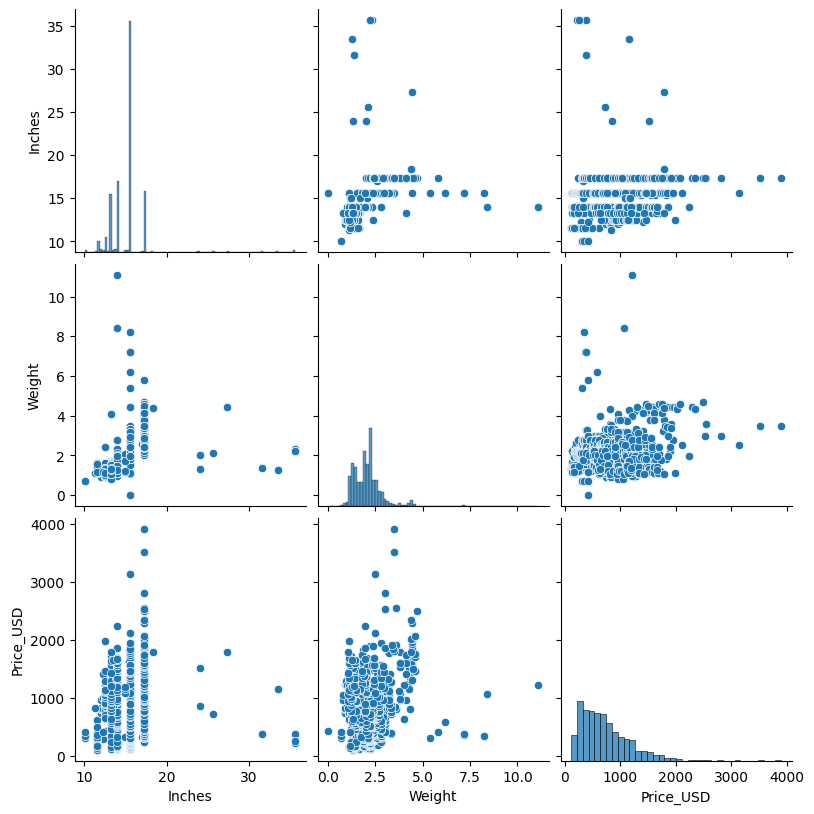

In [43]:
sns.pairplot(laptop_data_clean, height=2.75)

In [44]:
# #comparison_result = (df[["col1", "col2", "col3"]].eq(df["col4"], axis=0)).all(axis=1)
# comparison_result = (laptop_data_clean[["RAM", "Memory", "Inches"]].eq(laptop_data_clean["Price_USD"], axis=0)).all(axis=1)
# print("Comparison Result:")
# print(comparison_result)

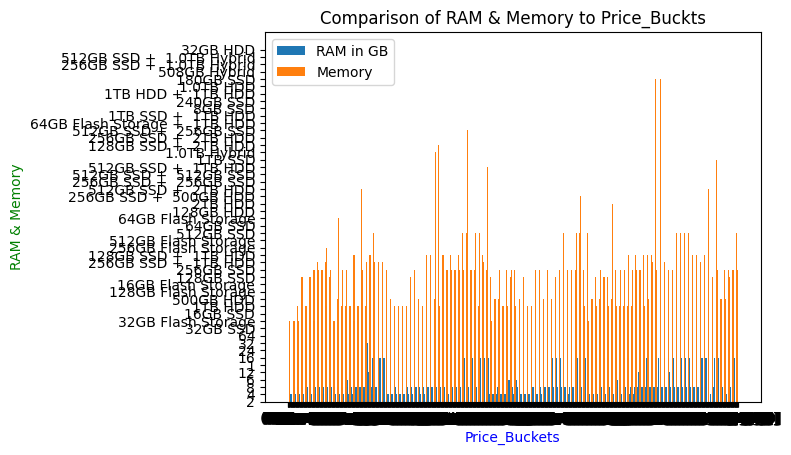

In [48]:
# Final Attempt to plot RAM/Memory against price buckets! Got it to work, but need to figure out spacing

# Define Axes
X = laptop_data_clean["Price_Buckets"]
Y = laptop_data_clean["RAM_in_GB"]
Z = laptop_data_clean["Memory"]

#Define x-axis length
X_axis = np.arange(len(X))

# create bar graph for RAM and for Memory
plt.bar(X_axis - 0.2, Y, 0.4, label = "RAM in GB")
plt.bar(X_axis + 0.2, Z, 0.4, label = "Memory")

# Creating tick marks, labels, title, legend
plt.xticks(X_axis,X)
plt.xlabel("Price_Buckets",color = "blue")
plt.ylabel("RAM & Memory", color = "green")
plt.title("Comparison of RAM & Memory to Price_Buckts")
plt.legend()
plt.show()

In [45]:
# # assuming 'df' is your Pandas DataFrame
# # x_cols = ['RAM', 'Memory']  # columns to compare
# # y_col = 'Price_Buckets'  # column to plot against

# # plt.bar(laptop_data_clean[x_cols[0]], laptop_data_clean[x_cols[1]], c=laptop_data_clean[y_col])
# # plt.xlabel(' '.join(x_cols))  # label x-axis
# # plt.ylabel(y_col)  # label y-axis
# # plt.title('Comparison of {} to {}'.format(', '.join(x_cols), y_col))
# # plt.show()

# plt.bar(laptop_data_clean["RAM"[0]],laptop_data_clean["Memory"[1]], c=laptop_data_clean["Price_Buckets"[y]])
# plt.xlabel("Price Buckets")
# plt.ylabel("Memory & RAM")
# plt.title("Comparison of RAM & Memory to Price Buckets")
# plt.show()

In [46]:
#plt.bar(df['Category'], df['Value1'], label='Value1')
#plt.bar(df['Category'], df['Value2'], bottom=df['Value1'], label='Value2')
#plt.xlabel('Category')
#plt.ylabel('Value')
#plt.title('Grouped Bar Chart')
#plt.legend()
#plt.show()

# plt.bar(laptop_data_clean['Price_Buckets'], laptop_data_clean['Memory'], label='Memory')
# plt.bar(laptop_data_clean['Price_Buckets'], laptop_data_clean['RAM'], bottom=laptop_data_clean['RAM'], label='RAM')
# plt.xlabel('Price_Buckets')
# plt.ylabel('RAM & Memory')
# plt.title('Grouped Bar Chart')
# plt.legend()
# plt.show()

In [ ]:
# Alternative attempt to graph RAM and Memory by price buckets


# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
labels = laptop_data_clean["Price_Buckets"]
# men_means = [20, 34, 30, 35, 27]
ram = laptop_data_clean["RAM"]
# women_means = [25, 32, 34, 20, 25]
memory = laptop_data_clean["Memory"]

# x = np.arange(len(labels)) 
# the label locations
x = np.arange(len(labels))

# width = 0.35  # the width of the bars
width = 0.35

# fig, ax = plt.subplots()
fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects1 = ax.bar(x - width/2, ram, width, label="RAM")
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')
rects2 = ax.bar(x + width/2, memory, width, label="Memory")

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
ax.set_ylabel("RAM & Memory")
# set custom x-axis label
ax.set_xlabel("Price Buckets")
# ax.set_title('Scores by group and gender')
ax.set_title("RAM & Memory by Price Bucket")
# ax.set_xticks(x)
ax.set_xticks(x)
# ax.set_xticklabels(labels)
ax.set_xticklabels(labels)
# ax.legend()
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# Attach a text label above each bar in "rects"
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
        xy = (rect.get_x() + rect.get_width() / 2, height),
        #3 pt vertical offset
        xytext = (0,3), 
        textcoords = "offset points",
        ha = "center", va= "bottom")


# autolabel(rects1)
autolabel(rects1)
# autolabel(rects2)
autolabel(rects2)

# fig.tight_layout()
fig.tight_layout()

# plt.show()
plt.show()

### **Analysis & Insights**

### **Findings**

### **Supporting Data**

## **Conclusion & Recommendations**